### Part 2 - Real and Fake identification

In [19]:
import collections
import io
import math
import os
import random
from six.moves import urllib
import pandas as pd


In [14]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))

In [17]:
data_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/"

In [15]:
#Extracting Zip file
from zipfile import ZipFile

with ZipFile(data_dir+'Part 3 - Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall("/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/")

In [20]:
#List of folders in extracted file
dir_list = next(os.walk(data_dir+str("/PINS/")))[1]
dir_list.sort()

In [19]:
dir_list

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [20]:
#Creating Metadata for the dataset
import os.path
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/')

In [21]:
len(metadata)

10770

In [22]:
import cv2
def load_image(path):
    img = cv2.imread(path)
    #img_resize= cv2.resize(img, (224, 224))   
    return img[...,::-1]

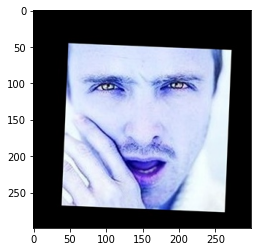

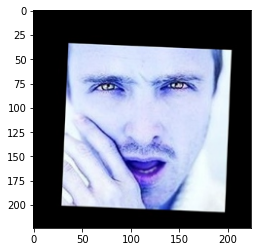

In [72]:
a=cv2.imread(str(metadata[2]))
import matplotlib.pyplot as plt
plt.imshow(a)
plt.show()

img_resize= cv2.resize(a, (224, 224))
plt.imshow(img_resize)
plt.show()

In [23]:

# Tensorflow version == 2.0.0
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

# Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/Part 3 - vgg_face_weights.h5')


In [24]:
#considering Vgg face architecture upto dense layer to obtain embedding vector
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [76]:
#preprocossing and predicting embedding vector of images ussing vgg face
#with tf.device('/device:GPU:0'):
embedded = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
  try:
    img = load_image(m.image_path())
    img= cv2.resize(img, (224, 224)) 
    img = (img / 255.).astype(np.float32)
    img=np.expand_dims(img,axis=0)
    print(metadata[i])
    # obtain embedding vector for image
    embedded[i]=vgg_face.predict(img)
  except Exception as e:
    print(str(e))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg
/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/

In [77]:
embedded

array([[ 0.03167589, -0.01504   , -0.01242179, ...,  0.00045118,
         0.00219549, -0.00906325],
       [ 0.03498864, -0.00104781, -0.01251991, ..., -0.01050457,
         0.00179532,  0.02442422],
       [ 0.02793148, -0.00114619, -0.01266936, ..., -0.00904518,
        -0.00578319,  0.02124162],
       ...,
       [ 0.009684  ,  0.00361547, -0.01350802, ..., -0.01429788,
         0.01901416,  0.03894571],
       [ 0.00236186,  0.00097836, -0.00546995, ..., -0.01600438,
         0.01050686,  0.03674657],
       [ 0.0177847 ,  0.01069115,  0.01986551, ..., -0.02620805,
         0.03290177,  0.04875886]])

In [22]:
#preparing data to dataframe and save
import pandas as pd
final_data=pd.DataFrame()
final_data=pd.DataFrame(embedded)
final_data["ID"]=metadata



In [79]:
#saving embedding vector for all images as csv
from google.colab import files
final_data.to_csv('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/embedded_csv_file.csv')

In [2]:
#Loading csv file
import pandas as pd
emb_data=pd.read_csv('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 7 project/embedded_csv_file.csv',index_col=0)

In [3]:
emb_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,ID
0,0.031676,-0.015040,-0.012422,0.019586,-0.000449,0.011793,0.016010,0.007169,0.014952,0.006686,0.028523,0.018241,0.033671,0.020588,0.028220,0.003832,0.023087,0.025565,-0.010196,0.003007,-0.000217,0.025482,0.005245,0.025785,-0.012780,0.011767,-0.003396,-0.003759,0.008116,0.014651,0.013551,-0.005211,-0.013681,0.011781,0.009935,-0.000047,0.006818,-0.008713,0.007813,0.006489,...,-0.014772,-0.002958,-0.014544,-0.003518,0.015388,0.012887,-0.000617,-0.001057,-0.001289,-0.031814,-0.009660,-0.001488,-0.019182,-0.001374,-0.012520,-0.018674,-0.011412,-0.003068,-0.017341,-0.021969,-0.016905,-0.015862,-0.005151,0.021524,0.000250,-0.016025,-0.000726,-0.015349,0.016508,-0.014546,-0.010325,-0.026533,-0.003278,0.005907,-0.006819,-0.026824,0.000451,0.002195,-0.009063,/content/drive/MyDrive/PGPAIML/Computer Vision...
1,0.034989,-0.001048,-0.012520,0.025948,0.025739,0.029662,0.001557,0.016853,-0.001046,0.004390,0.017489,0.009206,0.001139,0.001126,0.016858,0.011523,0.016743,0.011858,0.015663,0.000172,0.013054,0.017134,0.014138,0.028358,0.010358,-0.003691,0.002378,0.005870,0.003008,0.009233,0.013982,-0.008205,-0.011512,0.025225,-0.002961,-0.011719,-0.013871,-0.019118,0.007597,-0.001765,...,-0.001608,0.006502,-0.025830,0.013987,0.008135,0.001995,-0.003502,-0.007804,0.015285,-0.006704,0.002546,0.013355,-0.019485,-0.007478,0.002636,-0.001028,-0.006446,-0.018139,-0.006552,-0.011318,0.014761,0.005320,-0.021613,0.027862,0.025121,0.007683,-0.001097,0.003078,0.007763,0.005892,0.002691,-0.002645,0.001809,0.014744,-0.017623,-0.017727,-0.010505,0.001795,0.024424,/content/drive/MyDrive/PGPAIML/Computer Vision...
2,0.027931,-0.001146,-0.012669,0.029608,0.032451,0.023675,0.000781,0.016062,-0.010639,0.011864,0.010342,0.011349,-0.003006,-0.010004,0.011583,0.007590,0.025479,0.006828,0.017619,0.007953,0.013815,0.023982,0.013064,0.034427,0.014828,-0.000817,0.006820,0.008011,0.004808,0.002455,0.018097,-0.006039,-0.007636,0.028462,-0.007131,-0.012374,-0.014111,-0.014553,0.012679,-0.003091,...,-0.001309,0.004103,-0.019221,0.015036,0.021312,0.003955,0.007460,-0.003729,0.019752,-0.003408,-0.001378,0.013402,-0.019343,-0.004923,0.008459,0.001230,-0.007138,-0.015260,-0.009527,-0.005572,0.006995,0.003316,-0.015714,0.020980,0.019182,0.001830,-0.009500,0.003636,0.001798,0.001263,0.011110,0.001349,-0.004842,0.025973,-0.014618,-0.013254,-0.009045,-0.005783,0.021242,/content/drive/MyDrive/PGPAIML/Computer Vision...
3,0.014999,-0.005069,-0.001583,0.018881,0.015894,0.027852,0.001887,0.017888,-0.003925,0.017894,0.020000,0.003779,0.006746,-0.004680,0.017428,0.001280,0.027624,0.012943,0.015921,0.003129,0.009565,0.018368,0.013866,0.013150,0.006228,0.012961,0.020473,0.011798,0.014723,0.014422,0.015550,-0.002001,-0.009413,0.025952,-0.010467,0.000052,-0.009608,-0.005600,0.005009,-0.004661,...,-0.006302,-0.002911,-0.012977,0.008070,0.017038,0.006225,0.007529,-0.000297,0.006630,-0.011968,-0.000996,0.011553,-0.014421,-0.010415,0.006669,-0.002687,0.010639,-0.010278,-0.005825,0.001100,0.002100,-0.000983,-0.010152,0.019890,0.014962,-0.004007,-0.012251,0.009046,0.008426,-0.002019,-0.003639,-0.006398,0.004696,0.005749,-0.012647,-0.012422,-0.005749,-0.005911,0.015761,/content/drive/MyDrive/PGPAIML/Computer Vision...
4,0.033061,-0.005433,0.000652,0.024558,0.016241,0.018748,0.005779,0.013712,-0.003077,0.001135,0.006069,0.001075,0.011140,0.018344,0.015614,-0.002670,0.017767,0.011502,0.004679,-0.007847,-0.004346,0.015133,0.013776,0.019354,0.003507,-0.000955,0.000946,0.001585,0.011038,0.011680,0.017280,0.001491,-0.019071,0.027846,0.002855,-0.004103,-0.002072,-0.011928,0.007280,-0.006255,...,-0.016231,0.008239,-0.012373,0.003117,0.011624,0.003630,-0.012440,-0.006199,0.004800,-0.017411,-0.001531,0.

In [4]:
# splitting the ID column and creating labels
a=[]
names=[]
for i in range(0,len(emb_data)):
  a_split=emb_data["ID"][i].split("/")[-2]
  a.append(a_split)
  name=a[i].split("_")[-1]
  names.append(name)

In [5]:
emb_data['Labels']=names

In [6]:
#Labels for the data
emb_data['Labels'].unique()

array(['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco',
       'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt',
       'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz',
       'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt',
       'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco',
       'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke',
       'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow',
       'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg',
       'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington',
       'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams',
       'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter',
       'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ',
       'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso',
       'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper',
       'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies',
 

In [7]:
#Encoding the labels
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
emb_data['Labels']=enc.fit_transform(emb_data['Labels'])

In [8]:
emb_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,ID,Labels
0,0.031676,-0.015040,-0.012422,0.019586,-0.000449,0.011793,0.016010,0.007169,0.014952,0.006686,0.028523,0.018241,0.033671,0.020588,0.028220,0.003832,0.023087,0.025565,-0.010196,0.003007,-0.000217,0.025482,0.005245,0.025785,-0.012780,0.011767,-0.003396,-0.003759,0.008116,0.014651,0.013551,-0.005211,-0.013681,0.011781,0.009935,-0.000047,0.006818,-0.008713,0.007813,0.006489,...,-0.002958,-0.014544,-0.003518,0.015388,0.012887,-0.000617,-0.001057,-0.001289,-0.031814,-0.009660,-0.001488,-0.019182,-0.001374,-0.012520,-0.018674,-0.011412,-0.003068,-0.017341,-0.021969,-0.016905,-0.015862,-0.005151,0.021524,0.000250,-0.016025,-0.000726,-0.015349,0.016508,-0.014546,-0.010325,-0.026533,-0.003278,0.005907,-0.006819,-0.026824,0.000451,0.002195,-0.009063,/content/drive/MyDrive/PGPAIML/Computer Vision...,0
1,0.034989,-0.001048,-0.012520,0.025948,0.025739,0.029662,0.001557,0.016853,-0.001046,0.004390,0.017489,0.009206,0.001139,0.001126,0.016858,0.011523,0.016743,0.011858,0.015663,0.000172,0.013054,0.017134,0.014138,0.028358,0.010358,-0.003691,0.002378,0.005870,0.003008,0.009233,0.013982,-0.008205,-0.011512,0.025225,-0.002961,-0.011719,-0.013871,-0.019118,0.007597,-0.001765,...,0.006502,-0.025830,0.013987,0.008135,0.001995,-0.003502,-0.007804,0.015285,-0.006704,0.002546,0.013355,-0.019485,-0.007478,0.002636,-0.001028,-0.006446,-0.018139,-0.006552,-0.011318,0.014761,0.005320,-0.021613,0.027862,0.025121,0.007683,-0.001097,0.003078,0.007763,0.005892,0.002691,-0.002645,0.001809,0.014744,-0.017623,-0.017727,-0.010505,0.001795,0.024424,/content/drive/MyDrive/PGPAIML/Computer Vision...,0
2,0.027931,-0.001146,-0.012669,0.029608,0.032451,0.023675,0.000781,0.016062,-0.010639,0.011864,0.010342,0.011349,-0.003006,-0.010004,0.011583,0.007590,0.025479,0.006828,0.017619,0.007953,0.013815,0.023982,0.013064,0.034427,0.014828,-0.000817,0.006820,0.008011,0.004808,0.002455,0.018097,-0.006039,-0.007636,0.028462,-0.007131,-0.012374,-0.014111,-0.014553,0.012679,-0.003091,...,0.004103,-0.019221,0.015036,0.021312,0.003955,0.007460,-0.003729,0.019752,-0.003408,-0.001378,0.013402,-0.019343,-0.004923,0.008459,0.001230,-0.007138,-0.015260,-0.009527,-0.005572,0.006995,0.003316,-0.015714,0.020980,0.019182,0.001830,-0.009500,0.003636,0.001798,0.001263,0.011110,0.001349,-0.004842,0.025973,-0.014618,-0.013254,-0.009045,-0.005783,0.021242,/content/drive/MyDrive/PGPAIML/Computer Vision...,0
3,0.014999,-0.005069,-0.001583,0.018881,0.015894,0.027852,0.001887,0.017888,-0.003925,0.017894,0.020000,0.003779,0.006746,-0.004680,0.017428,0.001280,0.027624,0.012943,0.015921,0.003129,0.009565,0.018368,0.013866,0.013150,0.006228,0.012961,0.020473,0.011798,0.014723,0.014422,0.015550,-0.002001,-0.009413,0.025952,-0.010467,0.000052,-0.009608,-0.005600,0.005009,-0.004661,...,-0.002911,-0.012977,0.008070,0.017038,0.006225,0.007529,-0.000297,0.006630,-0.011968,-0.000996,0.011553,-0.014421,-0.010415,0.006669,-0.002687,0.010639,-0.010278,-0.005825,0.001100,0.002100,-0.000983,-0.010152,0.019890,0.014962,-0.004007,-0.012251,0.009046,0.008426,-0.002019,-0.003639,-0.006398,0.004696,0.005749,-0.012647,-0.012422,-0.005749,-0.005911,0.015761,/content/drive/MyDrive/PGPAIML/Computer Vision...,0
4,0.033061,-0.005433,0.000652,0.024558,0.016241,0.018748,0.005779,0.013712,-0.003077,0.001135,0.006069,0.001075,0.011140,0.018344,0.015614,-0.002670,0.017767,0.011502,0.004679,-0.007847,-0.004346,0.015133,0.013776,0.019354,0.003507,-0.000955,0.000946,0.001585,0.011038,0.011680,0.017280,0.001491,-0.019071,0.027846,0.002855,-0.004103,-0.002072,-0.011928,0.007280,-0.006255,...,0.008239,-0.012373,0.003117,0.011624,0.003630,-0.012440,-0.006199,0.004800,-0.017411,-0.001531,0.004765,-0.015641,-0.008137,-0.007001,0.0

In [13]:
#computing ecludian distance metrics for pair of image
import numpy as np
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [14]:
distance(emb_data.iloc[11,0:2622], emb_data.iloc[24,0:2622])

0.4061023463731892

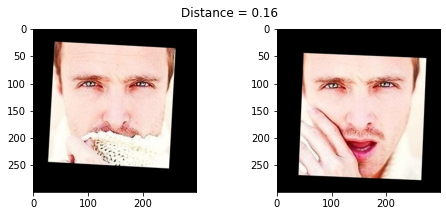

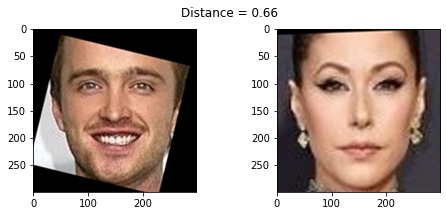

In [27]:
#pairs of images with the distance metric
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(emb_data.iloc[idx1,0:2622], emb_data.iloc[idx2,0:2622]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(3, 2)
show_pair(20, 180)

In [86]:
#splitting train and test index 
train_idx = np.arange(metadata.shape[0]) % 10 != 0
test_idx = np.arange(metadata.shape[0]) % 10 == 0

In [87]:
#total number of train data
np.sum(train_idx)

9693

In [88]:
#total number of test data
np.sum(test_idx)

1077

In [89]:
#preparing embedding vectors for train and test data split
X=emb_data.drop(['Labels','ID'],axis=1)
y=emb_data['Labels']
X_train = X[train_idx]
X_test = X[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

In [90]:
#standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [91]:
#PCA with 200 components
from sklearn.decomposition import PCA
n=200
pca_t=PCA(n_components=n,whiten=True)
pca_t.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [92]:
print(pca_t.components_)
print(pca_t.explained_variance_ratio_)

[[-2.42016308e-02  8.97250071e-03 -3.08510781e-03 ... -8.27636953e-03
   2.12077358e-02  3.89130596e-02]
 [ 2.01144304e-02 -1.21405027e-03  8.49868266e-03 ... -2.29662065e-02
  -4.12700768e-03  1.13062259e-02]
 [ 2.04524427e-03  2.45172034e-03 -6.39452387e-03 ...  1.07862647e-02
  -8.06196901e-05 -1.52124724e-02]
 ...
 [-1.07016183e-02  1.47151483e-03 -4.70526770e-03 ...  8.76807495e-03
   2.03852855e-02 -5.06602560e-03]
 [-8.06716125e-03  6.20947141e-03  6.39710827e-03 ...  9.47075574e-03
  -4.34003505e-02  6.55158002e-03]
 [ 3.20357927e-03 -3.12212532e-02 -6.16129698e-03 ... -2.54664453e-02
  -3.61994961e-02  5.13056118e-03]]
[0.13572608 0.05365674 0.03996252 0.03683288 0.0340054  0.03133039
 0.02577104 0.02356067 0.02094702 0.01926788 0.01811676 0.01713338
 0.01677031 0.01556806 0.01422285 0.01367592 0.01302354 0.01224229
 0.01155395 0.01137439 0.01090601 0.01057843 0.00957222 0.00939236
 0.00911094 0.00885164 0.00832984 0.00770788 0.00763098 0.00740529
 0.00701214 0.00668133 0.0063

In [93]:
print("Cumulative variance Explained {}".format(np.cumsum(pca_t.explained_variance_ratio_)))

Cumulative variance Explained [0.13572608 0.18938282 0.22934534 0.26617822 0.30018362 0.33151401
 0.35728505 0.38084572 0.40179273 0.42106061 0.43917737 0.45631075
 0.47308106 0.48864912 0.50287197 0.51654789 0.52957142 0.54181372
 0.55336767 0.56474205 0.57564806 0.58622649 0.59579871 0.60519107
 0.61430201 0.62315364 0.63148348 0.63919137 0.64682235 0.65422765
 0.66123978 0.66792111 0.67422417 0.68043318 0.68615032 0.69156131
 0.69683018 0.70198047 0.70701192 0.71187168 0.71632729 0.72065292
 0.72459848 0.72851    0.73219969 0.7357604  0.73920507 0.74256982
 0.74583106 0.74902473 0.75213834 0.75521989 0.75811949 0.7609316
 0.763717   0.76645489 0.76914681 0.77174891 0.77428333 0.77678158
 0.77918064 0.7815022  0.78375676 0.78593284 0.78805633 0.79010862
 0.79210746 0.79404118 0.79593245 0.79777956 0.79961036 0.80139603
 0.8031481  0.80487209 0.80656493 0.80822983 0.80986907 0.81148616
 0.81305279 0.81460932 0.81613659 0.81762184 0.81907918 0.82052017
 0.82194079 0.82331811 0.82467592

Total variance explained for 200 components is 90.8%

In [94]:
#transforming the data
X_train_pca = pca_t.transform(X_train)
X_test_pca = pca_t.transform(X_test)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [96]:
#Building SVC model
svc_model=SVC(C = 1, kernel = 'linear',gamma=0.1)
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_test_pca,y_test)

0.958217270194986

95.8 % accuracy in SVC model

Text(0.5, 1.0, 'Identified as Amanda Crew')

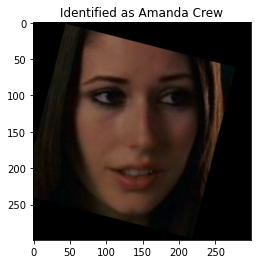

In [100]:
# Identifying images of test data
example_data=emb_data.iloc[1,:]
example_image = load_image(metadata[test_idx][20].image_path())
example_pred = svc_model.predict([X_test_pca[20]])
example_name = enc.inverse_transform(example_pred)[0]
plt.imshow(example_image)
plt.title(f'Identified as {example_name}')

Text(0.5, 1.0, 'Identified as Brenton Thwaites')

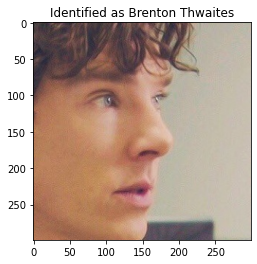

In [102]:
# Identifying images of test data
example_image = load_image(metadata[test_idx][50].image_path())
example_pred = svc_model.predict([X_test_pca[50]])
example_name = enc.inverse_transform(example_pred)[0]
plt.imshow(example_image)
plt.title(f'Identified as {example_name}')

### Conclusion

* VGG Face architecture and pre-trained VGG Face weights are used to create the embeddding vector of each image
* Final layer have 2622 embedding vector
* Reducing the dimension of 2622 to 200 PCA component featurs using PCA
* Finally predicted the celebrity name using SVC classifier at 95% accuracy